In [2]:
import pandas as pd
from statistics import mean, stdev
import numpy as np
import matplotlib.pyplot as plt

### Load the data from the CSV file

In [9]:
path_to_csv = "gen_data.csv"
df = pd.read_csv(path_to_csv)
df = df.drop(columns=['Unnamed: 0'])
nb_rows, nb_col = df.shape

In [10]:
path_to_whole_csv = "data.csv"
data = pd.read_csv(path_to_whole_csv)

## Question 2
Compute, for each pair of individuals (and report the first 5), the mean m of the number
of alleles shared and the standard deviation s of the number of alleles shared.

In [57]:
mat_m = np.zeros([nb_rows, nb_rows])
mat_s = np.zeros([nb_rows, nb_rows])
for i, rowi in df.iterrows():
    for j, rowj in df.iterrows():
        if j >= i:
            continue
        shared_alleles = abs(rowi - rowj)
        mat_m[i][j] = shared_alleles.mean()
        mat_s[i][j] = shared_alleles.std()

In [58]:
print("First 5 of mean matrix : ")
print(mat_m[:5,:5])
print("\nFirst 5 of std matrix : ")
print(mat_s[:5,:5])

First 5 of mean matrix : 
[[0.         0.         0.         0.         0.        ]
 [0.75129918 0.         0.         0.         0.        ]
 [0.7548874  0.75372079 0.         0.         0.        ]
 [0.75280164 0.7492311  0.49945205 0.         0.        ]
 [0.75333192 0.75266023 0.74723371 0.74497119 0.        ]]

First 5 of std matrix : 
[[0.         0.         0.         0.         0.        ]
 [0.66189321 0.         0.         0.         0.        ]
 [0.661616   0.66358435 0.         0.         0.        ]
 [0.66329579 0.65876878 0.50028686 0.         0.        ]
 [0.66109112 0.66561081 0.66230251 0.66073938 0.        ]]


## Question 3
Compute, for each pair of individuals (and report the first 5), the fraction of variants
for which the individuals share 0 alleles (p0 ), and the fraction of variants for which the
individuals share 2 alleles (p2 ). Check if m = 1 − p0 + p2 holds.

In [59]:
mat_p0 = np.zeros([nb_rows, nb_rows])
mat_p2 = np.zeros([nb_rows, nb_rows])
for i, rowi in df.iterrows():
    for j, rowj in df.iterrows():
        if j >= i:
            continue
        shared_alleles = abs(rowi - rowj)
        # count number of 0 and 2 in row shared_alleles
        p0 = (shared_alleles == 0).sum()
        p2 = (shared_alleles == 2).sum()
        mat_p0[i][j] = p0
        mat_p2[i][j] = p2
mat_p0 = mat_p0 / nb_col
mat_p2 = mat_p2 / nb_col

In [60]:
print("First 5 of p0 matrix : ")
print(mat_p0[:5,:5])
print("\nFirst 5 of p2 matrix : ")
print(mat_p2[:5,:5])

First 5 of p0 matrix : 
[[0.         0.         0.         0.         0.        ]
 [0.37432389 0.         0.         0.         0.        ]
 [0.37146039 0.37363453 0.         0.         0.        ]
 [0.37412946 0.37381129 0.50068936 0.         0.        ]
 [0.37227348 0.37577332 0.37764698 0.37831866 0.        ]]

First 5 of p2 matrix : 
[[0.         0.         0.         0.         0.        ]
 [0.12562308 0.         0.         0.         0.        ]
 [0.12634779 0.12735532 0.         0.         0.        ]
 [0.1269311  0.12304239 0.00014141 0.         0.        ]
 [0.1256054  0.12843356 0.12488069 0.12328985 0.        ]]


### Check if m = 1 − p_0 + p_2

In [61]:
matrices_are_equal = True
for i in range(nb_rows):
    for j in range(nb_rows):
        if j >= i:
            continue
        exp_mean = 1 - mat_p0[i][j] + mat_p2[i][j]
        if abs(mat_m[i][j] - exp_mean) > 1e-15 : 
            matrices_are_equal = False
            break
if matrices_are_equal:
    print("Mean matrix is equal to expected mean matrix")
else:
    print("Mean matrix is not equal to expected mean matrix")


Mean matrix is equal to expected mean matrix


## Question 4 
Plot m against s and plot p0 against p2 . Comment on the results.

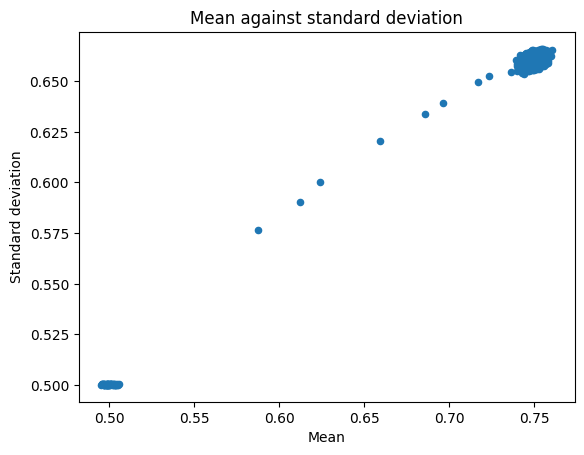

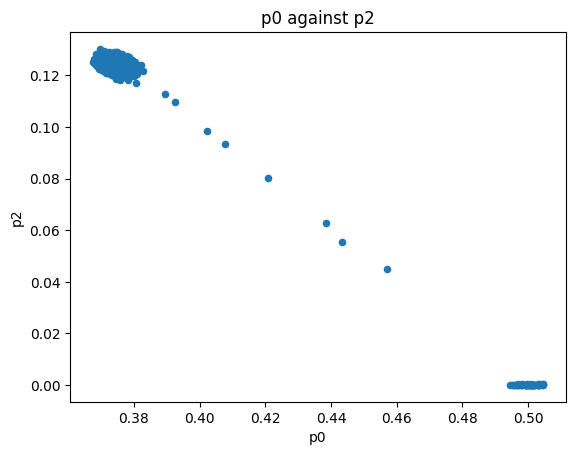

In [66]:
# plot m against s
m = mat_m.flatten()
s = mat_s.flatten()
m = m[m != 0]
s = s[s != 0]
plt.scatter(m, s, s=20)
plt.xlabel("Mean")
plt.ylabel("Standard deviation")
plt.title("Mean against standard deviation")
plt.show()

# plot p0 against p2
p0 = mat_p0.flatten()
p2 = mat_p2.flatten()
mask = (p0+p2) != 0
p0 = p0[mask]
p2 = p2[mask]
plt.scatter(p0, p2, s=20)
plt.xlabel("p0")
plt.ylabel("p2")
plt.title("p0 against p2")
plt.show()


We can clearly observe two distinct clusters in the data representation. The first cluster, depicted in the initial plot, is characterized by a standard deviation of 0.5. In the second plot, a distinct cluster emerges with p2=0, indicating a likely parent-offspring relationship.

## Question 5
Plot m against s and use the pedigree information of the YRI06.raw file to label the data
points in the scatterplot. Recall that column 3 and 4 from the YRI06.raw contain information
about the family relationship of the participants. Create two labels: one for individuals that
have a parent-offspring relationship and another one for unrelated individuals. Comment on
the results.

Red: there is relationship

Blue: no relationship

In [67]:
ped_info = data[['IID', 'PAT', 'MAT']]

colors = []

for i, rowi in ped_info.iterrows():
    for j, rowj in ped_info.iterrows():
        if j >= i:
            continue
        if rowi[0] in rowj.tolist()[1:]:
            colors.append('red')
        elif rowj[0] in rowi.tolist()[1:]:
            colors.append('red')
        else:
            colors.append('blue')

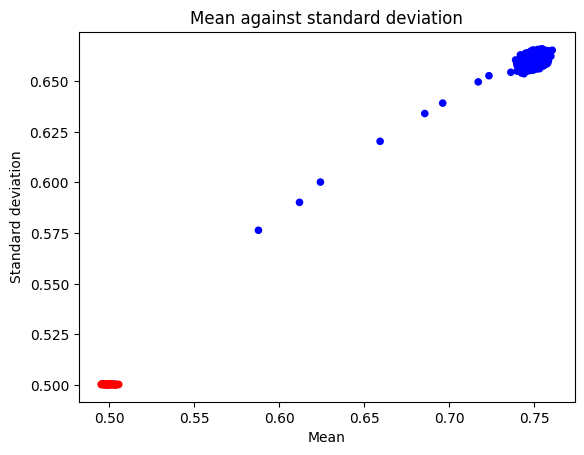

In [68]:
# plot m against s
m = mat_m.flatten()
s = mat_s.flatten()
m = m[m != 0]
s = s[s != 0]
plt.scatter(m, s, c=colors, s=20)
plt.xlabel("Mean")
plt.ylabel("Standard deviation")
plt.title("Mean against standard deviation")
plt.show()

Our reasoning about the plots in the question 4 are approved by color which emphasizes relationship.